In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path

In [3]:
sns.set_theme(style="darkgrid")

In [92]:
stats_dfs = []

for stats_file in Path("data/results_julia").glob("*_stats.txt"):
    df = pd.read_csv(stats_file, sep=";")
    df["file"] = stats_file
    stats_dfs.append(df)

df_stats = pd.concat(stats_dfs)

In [97]:
df_stats.metric.unique()

array(['log_data_likelihood', 'anderson_darling_test_statistics',
       'anderson_darling_p_value'], dtype=object)

In [93]:
df_stats = df_stats[df_stats["distribution"] != "-"].sort_values("value", ascending=False, inplace=False)
df_stats["metric_rank"] = (
    df_stats
    .groupby(["file", "metric"])
    .cumcount()
)

## Likelihood Wins

<Axes: xlabel='metric_rank', ylabel='count'>

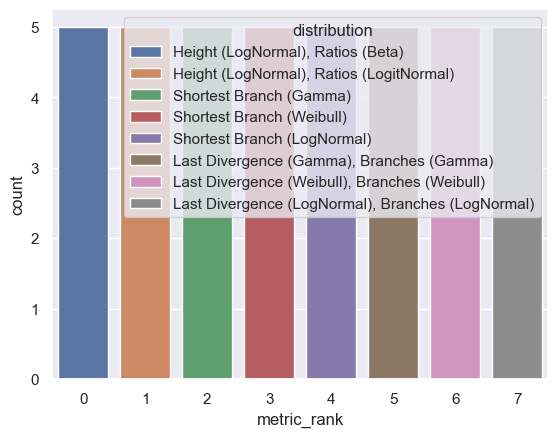

In [90]:
sns.countplot(data=df_stats[df_stats["metric"] == "log_data_likelihood"], x="metric_rank", hue="distribution")

In [4]:
credible_sets = pd.read_csv("/Users/tobiaochsner/Documents/Thesis/TractableTreeDistributions/ref_trees_credible_sets.log", sep=";")

In [5]:
credible_sets = credible_sets.sort_values(by="sample_credible_set")

In [6]:
credible_sets["index"] = credible_sets.groupby(['distribution']).cumcount()

Text(0.5, 0, 'Fraction of MCMC Trees')

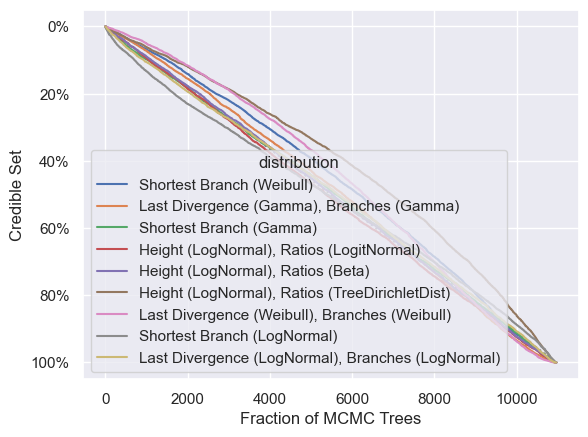

In [7]:
from matplotlib.ticker import PercentFormatter


plt.plot([0, credible_sets["index"].max()], [0, 1], color="grey", linestyle="dotted")

fig = sns.lineplot(credible_sets, x="index", y="sample_credible_set", hue="distribution")

fig.yaxis.set_major_formatter(PercentFormatter(1))

plt.gca().invert_yaxis()

plt.ylabel("Credible Set")
plt.xlabel("Fraction of MCMC Trees")

In [23]:
credible_sets

,distribution,sample_credible_set,index
50161,Shortest Branch (Weibull),0.0000,0
86700,"Last Divergence (Weibull), Branches (Weibull)",0.0000,0
95549,"Last Divergence (Weibull), Branches (Weibull)",0.0000,1
58646,Shortest Branch (Weibull),0.0000,1
41933,Shortest Branch (Gamma),0.0001,0
...,...,...,...
30062,Shortest Branch (LogNormal),1.0000,12300
64996,"Last Divergence (LogNormal), Branches (LogNormal)",1.0000,12300
94923,"Last Divergence (Weibull), Branches (Weibull)",1.0000,12299
97241,"Last Divergence (Weibull), Branches (Weibull)",1.0000,12300


In [24]:
credible_sets.head(50)

,distribution,sample_credible_set,index
50161,Shortest Branch (Weibull),0.0000,0
86700,"Last Divergence (Weibull), Branches (Weibull)",0.0000,0
95549,"Last Divergence (Weibull), Branches (Weibull)",0.0000,1
58646,Shortest Branch (Weibull),0.0000,1
41933,Shortest Branch (Gamma),0.0001,0
46345,Shortest Branch (Gamma),0.0001,1
92118,"Last Divergence (Weibull), Branches (Weibull)",0.0001,2
54234,Shortest Branch (Weibull),0.0001,2
60527,Shortest Branch (Weibull),0.0001,3
94636,"Last Divergence (Weibull), Branches (Weibull)",0.0001,3
